In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
import os
for dirparh, dirnames, filenames, in os.walk("pizza_steak"):
    print(f'There are {len(dirnames)} directories and {len(filenames)}')

There are 2 directories and 0
There are 2 directories and 0
There are 0 directories and 250
There are 0 directories and 250
There are 2 directories and 0
There are 0 directories and 750
There are 0 directories and 750


In [7]:
os.walk("pizza_steak")

<generator object walk at 0x0000022187DC5C10>

In [8]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

In [9]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape: {img.shape}")
    return img

Image shape: (384, 512, 3)


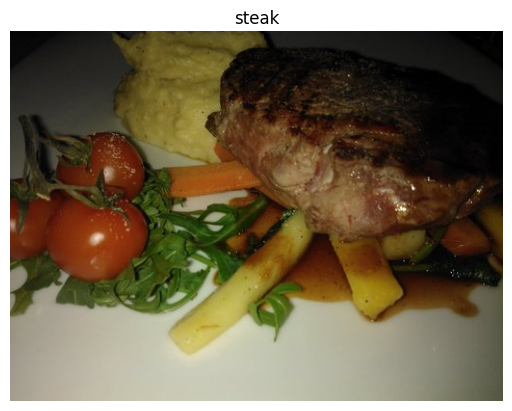

In [11]:
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [12]:
img

array([[[  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  2,   2,   2],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  0,   0,   0],
        [  1,   1,   1],
        [  3,   3,   3],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  1,   1,   1]],

       ...,

       [[163, 157, 141],
        [163, 157, 141],
        [164, 158, 142],
        ...,
        [ 86,  88,  67],
        [ 86,  88,  66],
        [ 86,  88,  66]],

       [[163, 157, 141],
        [163, 157, 141],
        [164, 158, 142],
        ...,
        [ 86,  88,  66],
        [ 85,  87,  65],
        [ 85,  87,  65]],

       [[163, 157, 141],
        [164, 158, 142],
        [164, 158, 142],
        ...,
        [ 85,  87,  65],
        [ 85,  87,  65],
        [ 84,  86,  64]]

In [13]:
img.shape

(384, 512, 3)

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
ImageDataGenerator(rescale=1./255)

In [16]:
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

In [16]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [17]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 5s 97ms/step - loss: 0.6949 - accuracy: 0.4840 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 98ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 4s 89ms/step - loss: 0.6932 - accuracy: 0.4907 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 4s 84ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 4s 87ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [18]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [19]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/20
47/47 [==============================] - 5s 89ms/step - loss: 36.3130 - accuracy: 0.5987 - val_loss: 1.3353 - val_accuracy: 0.7000
Epoch 2/20
47/47 [==============================] - 4s 81ms/step - loss: 0.9775 - accuracy: 0.7100 - val_loss: 0.8221 - val_accuracy: 0.5660
Epoch 3/20
47/47 [==============================] - 4s 78ms/step - loss: 0.6157 - accuracy: 0.7267 - val_loss: 0.4831 - val_accuracy: 0.7520
Epoch 4/20
47/47 [==============================] - 4s 77ms/step - loss: 0.5278 - accuracy: 0.7633 - val_loss: 0.5971 - val_accuracy: 0.7460
Epoch 5/20
47/47 [==============================] - 4s 79ms/step - loss: 0.5184 - accuracy: 0.7627 - val_loss: 0.5159 - val_accuracy: 0.7560
Epoch 6/20
47/47 [==============================] - 4s 82ms/step - loss: 0.4855 - accuracy: 0.7900 - val_loss: 0.4598 - val_accuracy: 0.7720
Epoch 7/20
47/47 [==============================] - 5s 95ms/step - loss: 0.5001 - accuracy: 0.7800 - val_loss: 0.4773 - val_accuracy: 0.7760
Epoch 8/20
4

In [20]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Image shape: (512, 512, 3)
Image shape: (318, 512, 3)


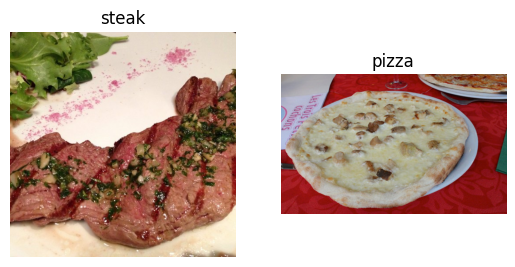

In [21]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [17]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [19]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [28]:
train_data.next()

(array([[[[0.7490196 , 0.49803925, 0.34901962],
          [0.7294118 , 0.4784314 , 0.29803923],
          [0.7725491 , 0.50980395, 0.30588236],
          ...,
          [0.00392157, 0.        , 0.00784314],
          [0.00392157, 0.        , 0.00784314],
          [0.00392157, 0.        , 0.00784314]],
 
         [[0.8470589 , 0.59607846, 0.454902  ],
          [0.81568635, 0.56078434, 0.39607847],
          [0.8431373 , 0.58431375, 0.39607847],
          ...,
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.01568628],
          [0.        , 0.        , 0.01568628]],
 
         [[0.8862746 , 0.6509804 , 0.5176471 ],
          [0.882353  , 0.6392157 , 0.48627454],
          [0.882353  , 0.63529414, 0.46274513],
          ...,
          [0.00392157, 0.00392157, 0.01176471],
          [0.        , 0.00392157, 0.01960784],
          [0.        , 0.00784314, 0.01960784]],
 
         ...,
 
         [[0.77647066, 0.69803923, 0.5019608 ],
          [0.76470

In [26]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [27]:
images[:2], images[0].shape

(array([[[[0.57254905, 0.5058824 , 0.4431373 ],
          [0.54509807, 0.37254903, 0.32156864],
          [0.61960787, 0.3921569 , 0.3137255 ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 0.9921569 , 0.9921569 ],
          [1.        , 0.9921569 , 1.        ]],
 
         [[0.4666667 , 0.35686275, 0.3019608 ],
          [0.4666667 , 0.3372549 , 0.27058825],
          [0.54901963, 0.34509805, 0.25882354],
          ...,
          [1.        , 1.        , 0.9921569 ],
          [1.        , 1.        , 0.9921569 ],
          [0.9843138 , 1.        , 1.        ]],
 
         [[0.39607847, 0.3019608 , 0.25490198],
          [0.38431376, 0.32156864, 0.25882354],
          [0.427451  , 0.28627452, 0.22352943],
          ...,
          [0.9960785 , 0.9960785 , 0.98823535],
          [0.9450981 , 0.9803922 , 0.97647065],
          [0.87843144, 0.9568628 , 0.9607844 ]],
 
         ...,
 
         [[0.8862746 , 0.86666673, 0.78823537],
          [0.89803

In [30]:
images[7].shape

(224, 224, 3)

In [31]:
labels

array([1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1.],
      dtype=float32)

In [20]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [10]:
tf.random.set_seed(42)

model_4 = Sequential([
    Conv2D(filters=10,
          kernel_size=3,
          strides=1,
          padding='valid',
          activation='relu',
          input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [11]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [12]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [13]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 15s 194ms/step - loss: 1.3515 - accuracy: 0.5233 - val_loss: 0.6507 - val_accuracy: 0.5900
Epoch 2/5
47/47 [==============================] - 4s 92ms/step - loss: 0.6129 - accuracy: 0.6727 - val_loss: 0.5346 - val_accuracy: 0.7220
Epoch 3/5
47/47 [==============================] - 4s 91ms/step - loss: 0.5106 - accuracy: 0.7613 - val_loss: 0.4342 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 4s 90ms/step - loss: 0.3855 - accuracy: 0.8433 - val_loss: 0.4206 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 4s 92ms/step - loss: 0.1949 - accuracy: 0.9367 - val_loss: 0.4646 - val_accuracy: 0.7940


In [37]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 129ms/step - loss: 0.3203 - accuracy: 0.8640


[0.3203306198120117, 0.8640000224113464]

In [38]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

<Axes: >

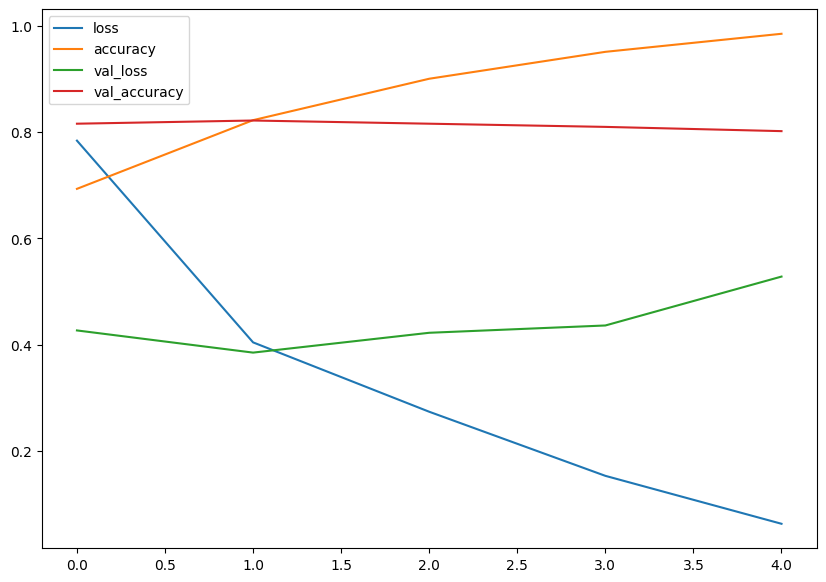

In [39]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [21]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

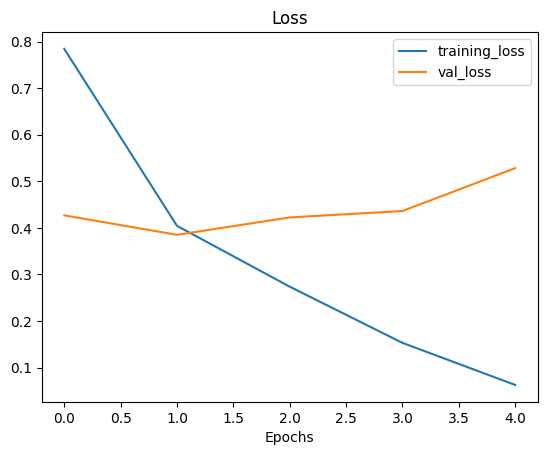

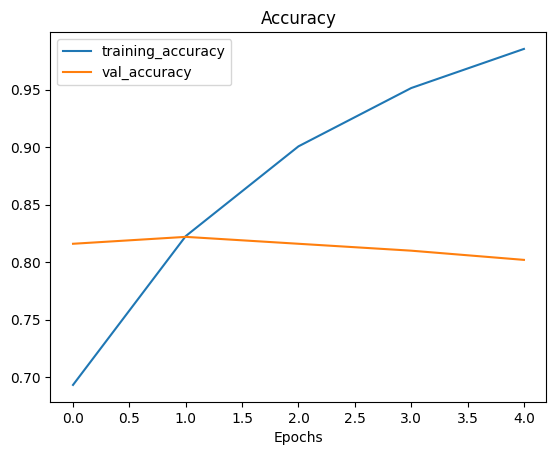

In [41]:
plot_loss_curves(history_4)

In [14]:
tf.random.set_seed(42)

model_5 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 5s 96ms/step - loss: 0.6275 - accuracy: 0.6387 - val_loss: 0.5451 - val_accuracy: 0.6880
Epoch 2/5
47/47 [==============================] - 4s 82ms/step - loss: 0.5011 - accuracy: 0.7660 - val_loss: 0.4355 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 4s 81ms/step - loss: 0.4491 - accuracy: 0.8020 - val_loss: 0.3689 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 4s 80ms/step - loss: 0.4122 - accuracy: 0.8180 - val_loss: 0.3277 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 4s 80ms/step - loss: 0.4022 - accuracy: 0.8207 - val_loss: 0.3412 - val_accuracy: 0.8680


In [16]:
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)      

In [18]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


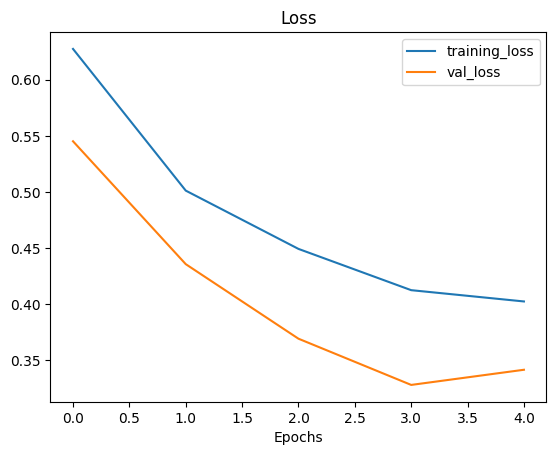

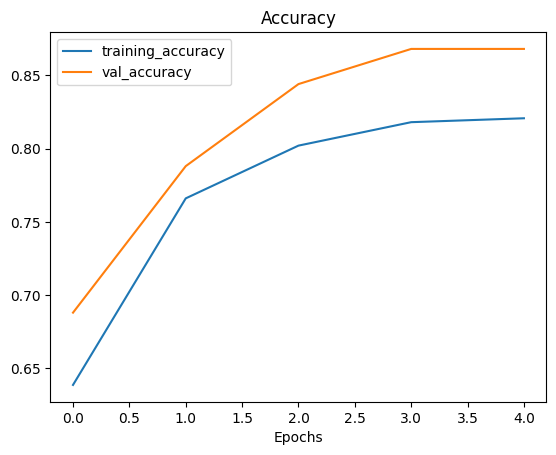

In [19]:
plot_loss_curves(history_5)

In [22]:
train_datagen_augmented = ImageDataGenerator(rescale=1/225.,
                                            rotation_range=20,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.3,
                                            horizontal_flip=True)

In [23]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [24]:
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)

Augmented training images:
Found 1500 images belonging to 2 classes.


In [25]:
print("Non-Augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

Non-Augmented training images:
Found 1500 images belonging to 2 classes.


In [26]:
print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Unchanged test images:
Found 500 images belonging to 2 classes.


In [27]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Augmented image')

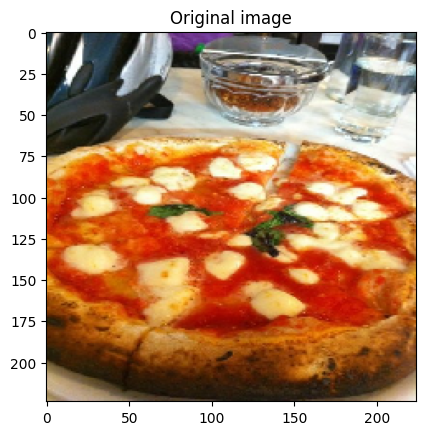

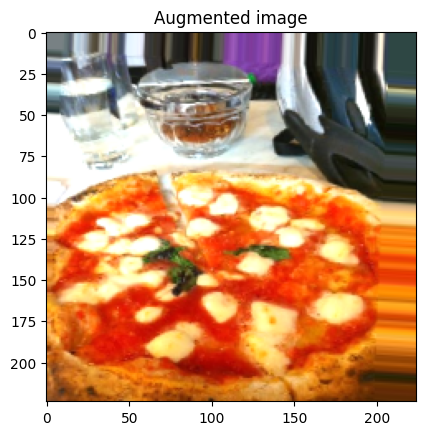

In [28]:
random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")

In [64]:
tf.random.set_seed(42)

model_6 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 229ms/step - loss: 0.7401 - accuracy: 0.4867 - val_loss: 0.6883 - val_accuracy: 0.5320
Epoch 2/5
47/47 [==============================] - 10s 218ms/step - loss: 0.6912 - accuracy: 0.5560 - val_loss: 0.6796 - val_accuracy: 0.7180
Epoch 3/5
47/47 [==============================] - 10s 214ms/step - loss: 0.6789 - accuracy: 0.6220 - val_loss: 0.6316 - val_accuracy: 0.7600
Epoch 4/5
47/47 [==============================] - 10s 216ms/step - loss: 0.6480 - accuracy: 0.6453 - val_loss: 0.5716 - val_accuracy: 0.6860
Epoch 5/5
47/47 [==============================] - 10s 212ms/step - loss: 0.6562 - accuracy: 0.6580 - val_loss: 0.5504 - val_accuracy: 0.7900


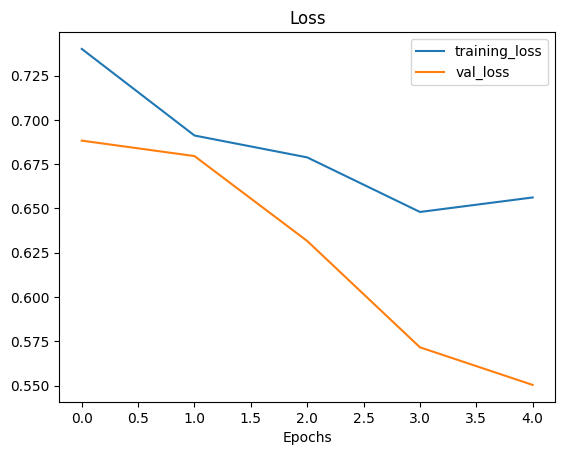

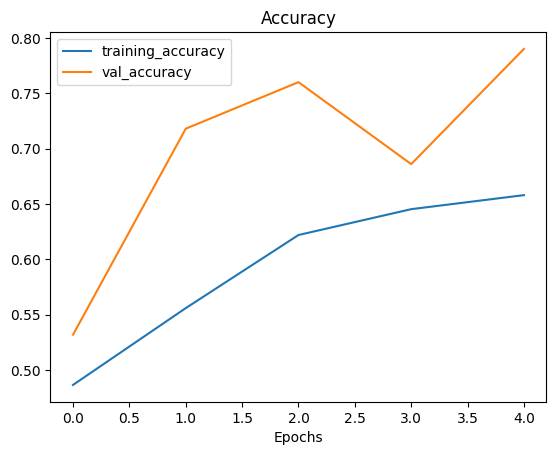

In [65]:
plot_loss_curves(history_6)

In [29]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [30]:
tf.random.set_seed(42)

model_7 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 466ms/step - loss: 0.6808 - accuracy: 0.5880 - val_loss: 0.6299 - val_accuracy: 0.5720
Epoch 2/5
47/47 [==============================] - 25s 541ms/step - loss: 0.5946 - accuracy: 0.6820 - val_loss: 0.4380 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 25s 524ms/step - loss: 0.5480 - accuracy: 0.7393 - val_loss: 0.4096 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 26s 540ms/step - loss: 0.5357 - accuracy: 0.7520 - val_loss: 0.4134 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 26s 543ms/step - loss: 0.5016 - accuracy: 0.7727 - val_loss: 0.4073 - val_accuracy: 0.8260


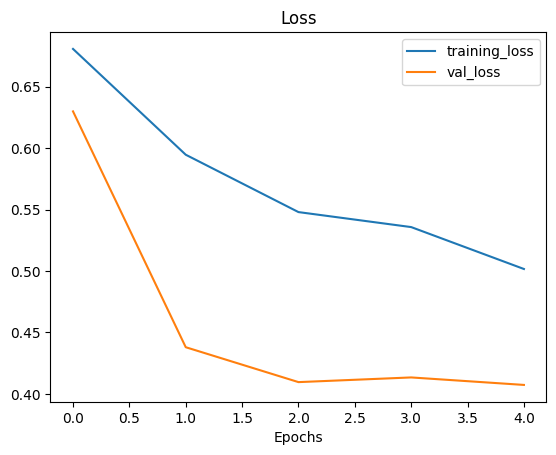

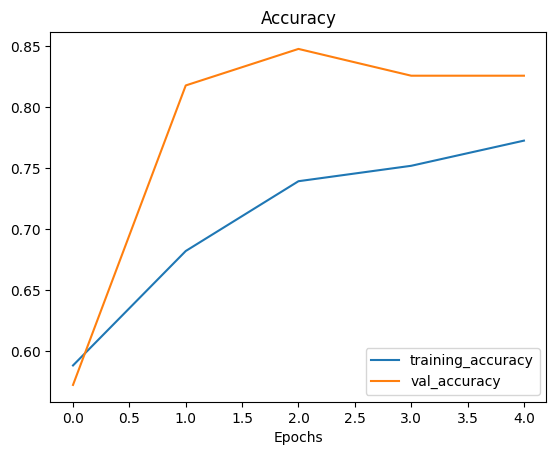

In [31]:
plot_loss_curves(history_7)

In [32]:
print(class_names)

['pizza' 'steak']


In [33]:
import matplotlib.image as mpimg

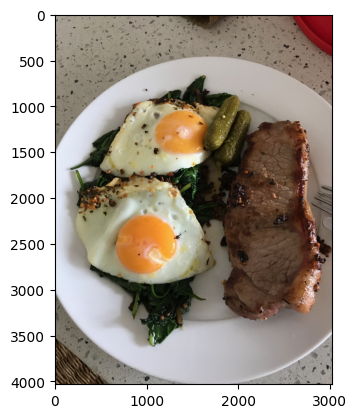

In [34]:
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)

In [78]:
steak.shape

(4032, 3024, 3)

In [35]:
model_7.predict(steak)

ValueError: in user code:

    File "C:\Users\manda\OneDrive\Desktop\Files\TensorFlow Developer Certificate in 2023 Zero to Mastery\My files\venv\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\manda\OneDrive\Desktop\Files\TensorFlow Developer Certificate in 2023 Zero to Mastery\My files\venv\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\manda\OneDrive\Desktop\Files\TensorFlow Developer Certificate in 2023 Zero to Mastery\My files\venv\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\manda\OneDrive\Desktop\Files\TensorFlow Developer Certificate in 2023 Zero to Mastery\My files\venv\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\manda\OneDrive\Desktop\Files\TensorFlow Developer Certificate in 2023 Zero to Mastery\My files\venv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\manda\OneDrive\Desktop\Files\TensorFlow Developer Certificate in 2023 Zero to Mastery\My files\venv\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 3024, 3)


In [36]:
tf.expand_dims(steak, axis=0).shape

TensorShape([1, 4032, 3024, 3])

In [37]:
steak = tf.expand_dims(steak, axis=0)

In [38]:
steak.shape

TensorShape([1, 4032, 3024, 3])

In [39]:
def load_and_prep_image(filename, img_shape=224):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, size=[img_shape, img_shape])
    img = img/225.
    return img;

In [40]:
steak = load_and_prep_image("03-steak.jpeg")

In [41]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.7227778 , 0.705     , 0.6561111 ],
        [0.7372222 , 0.7161111 , 0.66833335],
        [0.7161111 , 0.6894444 , 0.63611114],
        ...,
        [0.5911111 , 0.05777778, 0.10222222],
        [0.5611111 , 0.04777778, 0.08      ],
        [0.5988889 , 0.08777778, 0.11888889]],

       [[0.75      , 0.7322222 , 0.69222224],
        [0.7238889 , 0.70611113, 0.6527778 ],
        [0.74333334, 0.71666664, 0.66333336],
        ...,
        [0.6066667 , 0.07777778, 0.10444444],
        [0.60055554, 0.06722222, 0.10722222],
        [0.5827778 , 0.06277778, 0.09833334]],

       [[0.73888886, 0.7211111 , 0.6677778 ],
        [0.72444445, 0.69555557, 0.6433333 ],
        [0.7438889 , 0.71055555, 0.66055554],
        ...,
        [0.6022222 , 0.07333333, 0.09111111],
        [0.5977778 , 0.07777778, 0.11333334],
        [0.5922222 , 0.05888889, 0.09888889]],

       ...,

       [[0.5588889 , 0.48444444, 0.35166666],
        [0.06

In [42]:
model_7.predict(steak)

ValueError: in user code:

    File "C:\Users\manda\OneDrive\Desktop\Files\TensorFlow Developer Certificate in 2023 Zero to Mastery\My files\venv\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\manda\OneDrive\Desktop\Files\TensorFlow Developer Certificate in 2023 Zero to Mastery\My files\venv\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\manda\OneDrive\Desktop\Files\TensorFlow Developer Certificate in 2023 Zero to Mastery\My files\venv\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\manda\OneDrive\Desktop\Files\TensorFlow Developer Certificate in 2023 Zero to Mastery\My files\venv\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\manda\OneDrive\Desktop\Files\TensorFlow Developer Certificate in 2023 Zero to Mastery\My files\venv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\manda\OneDrive\Desktop\Files\TensorFlow Developer Certificate in 2023 Zero to Mastery\My files\venv\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 224, 3)


In [43]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 425ms/step


In [44]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [45]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [46]:
def pred_and_plot(model, filename, class_name=class_names):
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img, axis=0))
    pred_class = class_names[int(tf.round(pred))]
    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')

1/1 [==============================] - 0s 33ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


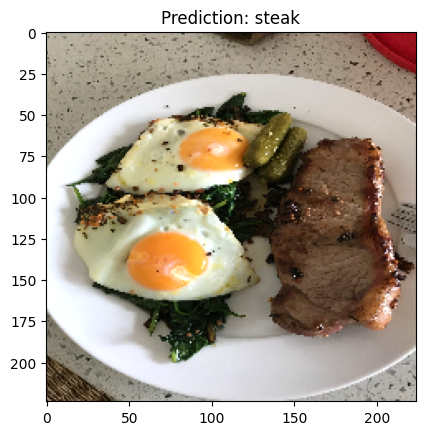

In [47]:
pred_and_plot(model_7, "03-steak.jpeg")

1/1 [==============================] - 0s 40ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


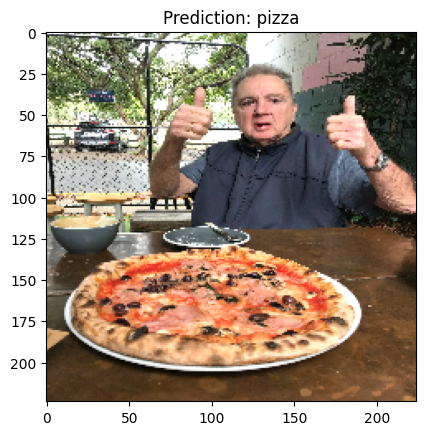

In [49]:
pred_and_plot(model_7, "03-pizza-dad.jpeg")

1/1 [==============================] - 0s 37ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


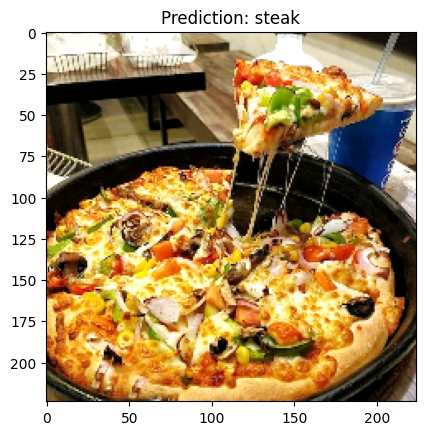

In [55]:
pred_and_plot(model_7, "TestPizza.jpg")

1/1 [==============================] - 0s 39ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


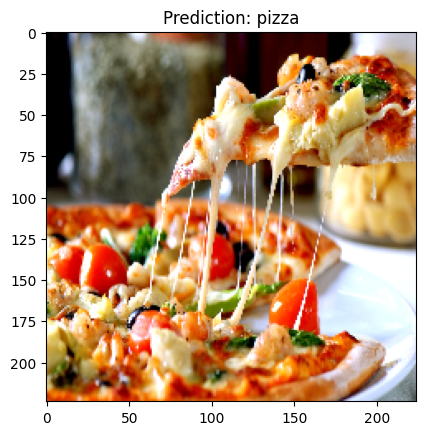

In [51]:
pred_and_plot(model_7, "TestPizza2.jpg")

1/1 [==============================] - 0s 38ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


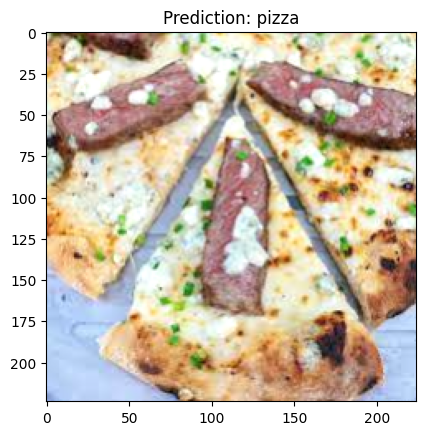

In [52]:
pred_and_plot(model_7, "steakpizzatest.jpeg")

1/1 [==============================] - 0s 33ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


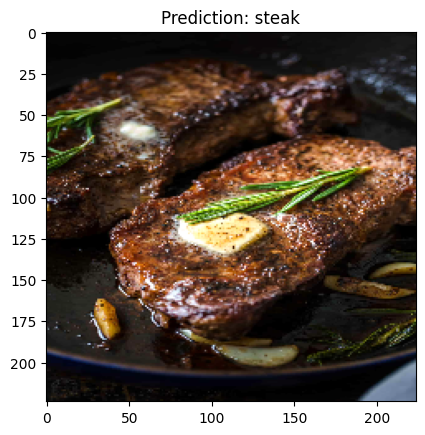

In [53]:
pred_and_plot(model_7, "TestSteak.jpg")

1/1 [==============================] - 0s 34ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


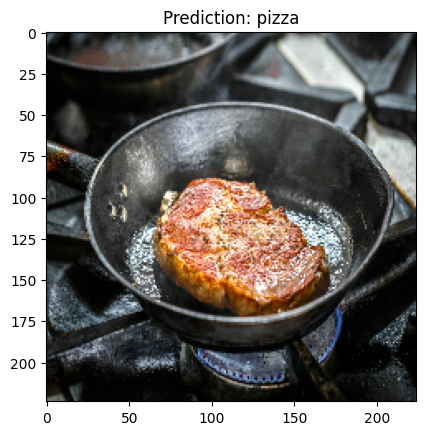

In [54]:
pred_and_plot(model_7, "TestSteak2.jpg")

In [2]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [3]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:
!dir

 Volume in drive C is Acer
 Volume Serial Number is A4D6-E32A

 Directory of C:\Users\manda\OneDrive\Desktop\Files\TensorFlow Developer Certificate in 2023 Zero to Mastery\My files

27-08-2023  22:56    <DIR>          .
04-08-2023  20:36    <DIR>          ..
27-08-2023  15:12    <DIR>          .ipynb_checkpoints
27-08-2023  16:08         3,564,285 03-hamburger.jpeg
27-08-2023  16:07         2,874,848 03-pizza-dad (1).jpeg
27-08-2023  11:45         2,874,848 03-pizza-dad.jpeg
27-08-2023  16:08         1,978,213 03-steak (1).jpeg
26-08-2023  12:52         1,978,213 03-steak.jpeg
27-08-2023  16:08         1,725,178 03-sushi.jpeg
27-08-2023  11:58    <DIR>          10_food_classes_all_data
27-08-2023  11:58       519,183,241 10_food_classes_all_data.zip
08-08-2023  17:11            17,704 best_model_HDF5_format.h5
08-08-2023  17:09    <DIR>          best_model_SavedModel_format
20-08-2023  22:33         1,995,650 Classification.ipynb
27-08-2023  22:56         6,488,949 CNN.ipynb
20-08-2023

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam, SGD

In [7]:
import random
random.choice(class_names)

'hamburger'

Image shape: (512, 382, 3)


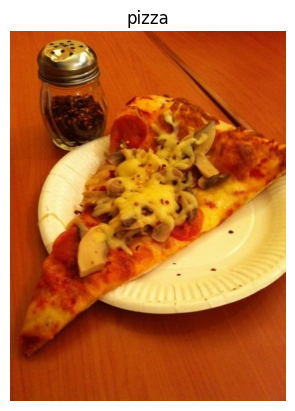

In [9]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [15]:
tf.random.set_seed(42)

model_8 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_8.compile(loss=CategoricalCrossentropy(), 
                optimizer=Adam(),
                metrics=['accuracy'])

In [78]:
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 47s 193ms/step - loss: 2.1726 - accuracy: 0.2000 - val_loss: 1.9824 - val_accuracy: 0.2964
Epoch 2/5
235/235 [==============================] - 41s 175ms/step - loss: 1.9239 - accuracy: 0.3248 - val_loss: 1.9281 - val_accuracy: 0.3228
Epoch 3/5
235/235 [==============================] - 41s 176ms/step - loss: 1.6725 - accuracy: 0.4245 - val_loss: 2.0789 - val_accuracy: 0.2984
Epoch 4/5
235/235 [==============================] - 41s 175ms/step - loss: 1.1629 - accuracy: 0.6127 - val_loss: 2.2826 - val_accuracy: 0.2980
Epoch 5/5
235/235 [==============================] - 40s 170ms/step - loss: 0.5398 - accuracy: 0.8245 - val_loss: 3.4774 - val_accuracy: 0.2560


In [79]:
model_8.evaluate(test_data)

79/79 [==============================] - 11s 132ms/step - loss: 3.4774 - accuracy: 0.2560


[3.477444887161255, 0.25600001215934753]

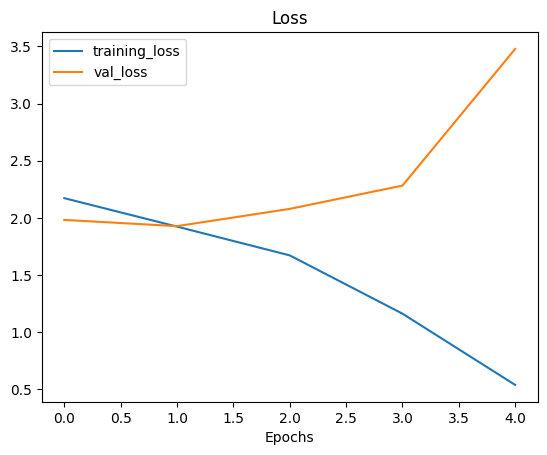

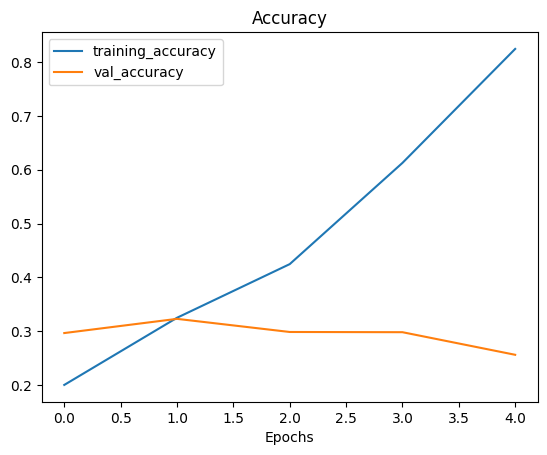

In [82]:
plot_loss_curves(history_8)

In [83]:
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_9.compile(loss=CategoricalCrossentropy(),
                 optimizer=Adam(),
                 metrics=['accuracy'])

history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 42s 178ms/step - loss: 2.2229 - accuracy: 0.2016 - val_loss: 2.0078 - val_accuracy: 0.2808
Epoch 2/5
235/235 [==============================] - 42s 178ms/step - loss: 1.8114 - accuracy: 0.3832 - val_loss: 1.9210 - val_accuracy: 0.3328
Epoch 3/5
235/235 [==============================] - 41s 172ms/step - loss: 1.3798 - accuracy: 0.5507 - val_loss: 1.9990 - val_accuracy: 0.3152
Epoch 4/5
235/235 [==============================] - 41s 173ms/step - loss: 0.8491 - accuracy: 0.7429 - val_loss: 2.4449 - val_accuracy: 0.2756
Epoch 5/5
235/235 [==============================] - 43s 180ms/step - loss: 0.4533 - accuracy: 0.8763 - val_loss: 2.8452 - val_accuracy: 0.2884


In [84]:
model_9.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 29160)             0         
                                                                 
 dense_3 (Dense)             (None, 10)               

In [86]:
model_8.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_8 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

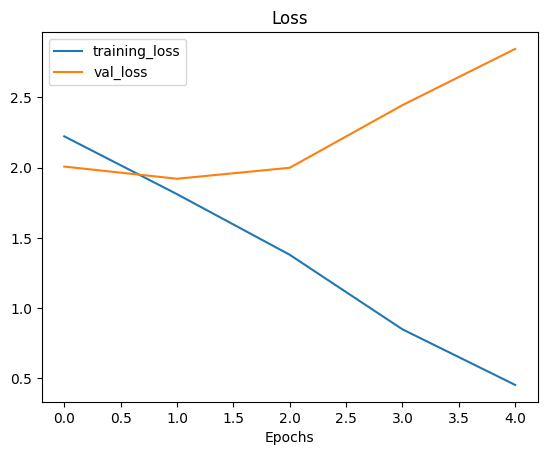

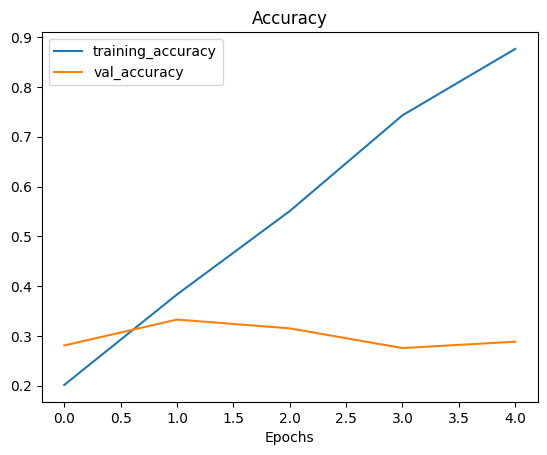

In [85]:
plot_loss_curves(history_9)

In [11]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [12]:
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss=CategoricalCrossentropy(),
                 optimizer=Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 114s 467ms/step - loss: 2.1586 - accuracy: 0.2325 - val_loss: 1.9942 - val_accuracy: 0.2948
Epoch 2/5
235/235 [==============================] - 91s 387ms/step - loss: 2.0415 - accuracy: 0.2920 - val_loss: 1.8996 - val_accuracy: 0.3532
Epoch 3/5
235/235 [==============================] - 87s 369ms/step - loss: 1.9979 - accuracy: 0.3043 - val_loss: 1.8552 - val_accuracy: 0.3612
Epoch 4/5
235/235 [==============================] - 58s 247ms/step - loss: 1.9671 - accuracy: 0.3172 - val_loss: 1.9586 - val_accuracy: 0.3536
Epoch 5/5
235/235 [==============================] - 127s 539ms/step - loss: 1.9485 - accuracy: 0.3348 - val_loss: 1.9082 - val_accuracy: 0.3400


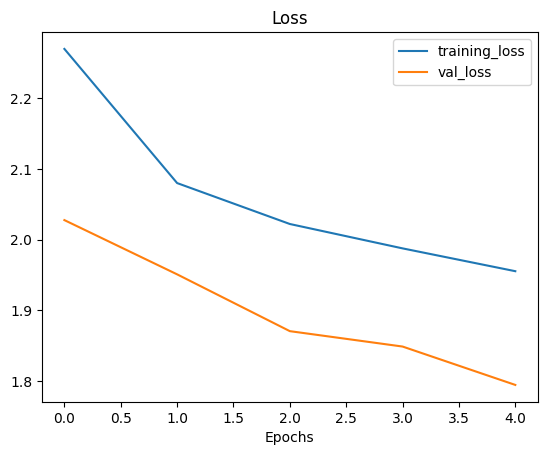

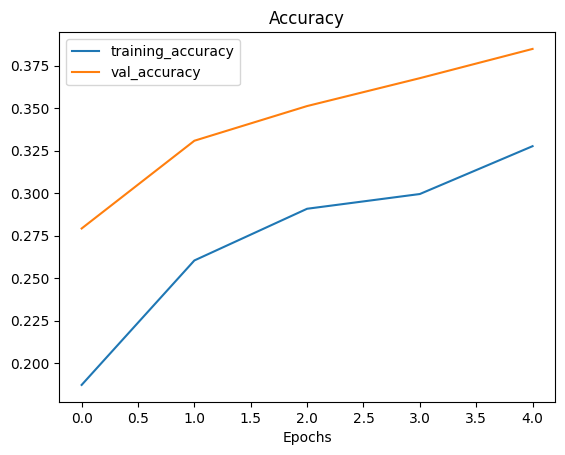

In [90]:
plot_loss_curves(history_10)

In [123]:
model_9.save("./Models/CNN/model_9.h5")
model_8.save("./Models/CNN/model_8.h5")
model_7.save("./Models/CNN/model_7.h5")
model_10.save("./Models/CNN/model_10.h5")

In [118]:
!dir

 Volume in drive C is Acer
 Volume Serial Number is A4D6-E32A

 Directory of C:\Users\manda\OneDrive\Desktop\Files\TensorFlow Developer Certificate in 2023 Zero to Mastery\My files

27-08-2023  16:32    <DIR>          .
04-08-2023  20:36    <DIR>          ..
27-08-2023  15:12    <DIR>          .ipynb_checkpoints
27-08-2023  16:08         3,564,285 03-hamburger.jpeg
27-08-2023  16:07         2,874,848 03-pizza-dad (1).jpeg
27-08-2023  11:45         2,874,848 03-pizza-dad.jpeg
27-08-2023  16:08         1,978,213 03-steak (1).jpeg
26-08-2023  12:52         1,978,213 03-steak.jpeg
27-08-2023  16:08         1,725,178 03-sushi.jpeg
27-08-2023  11:58    <DIR>          10_food_classes_all_data
27-08-2023  11:58       519,183,241 10_food_classes_all_data.zip
08-08-2023  17:11            17,704 best_model_HDF5_format.h5
08-08-2023  17:09    <DIR>          best_model_SavedModel_format
20-08-2023  22:33         1,995,650 Classification.ipynb
27-08-2023  16:32         6,347,494 CNN.ipynb
20-08-2023

In [96]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [112]:
def pred_and_plot(model, filename, class_name=class_names):
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img, axis=0))
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred))]
    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')

1/1 [==============================] - 0s 34ms/step


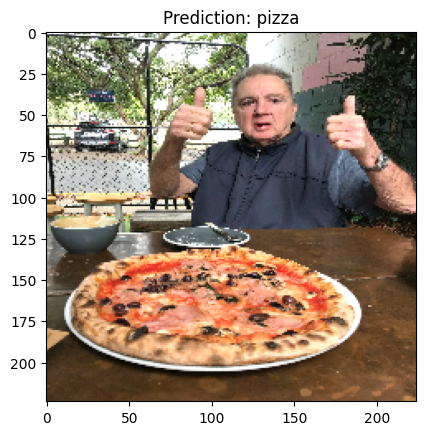

In [106]:
pred_and_plot(model=model_10,
              filename='03-pizza-dad (1).jpeg',
              class_name=class_names)

1/1 [==============================] - 0s 40ms/step


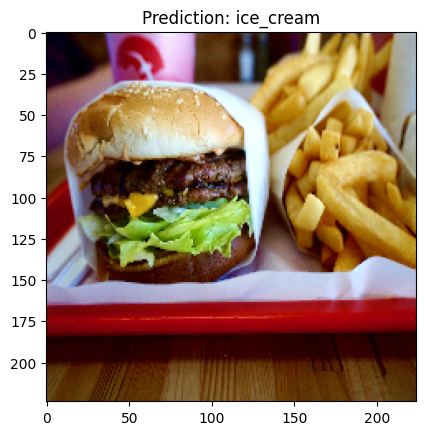

In [107]:
pred_and_plot(model=model_10,
              filename='03-hamburger.jpeg',
              class_name=class_names)

1/1 [==============================] - 0s 42ms/step


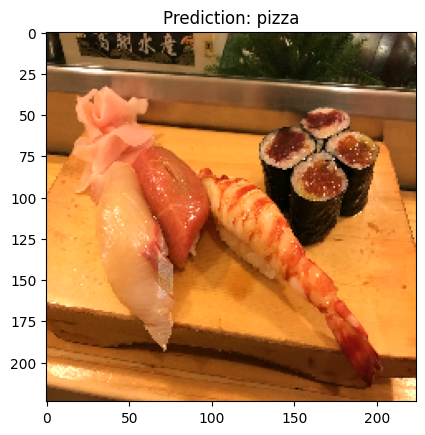

In [108]:
pred_and_plot(model=model_10,
              filename='03-sushi.jpeg',
              class_name=class_names)

1/1 [==============================] - 0s 30ms/step


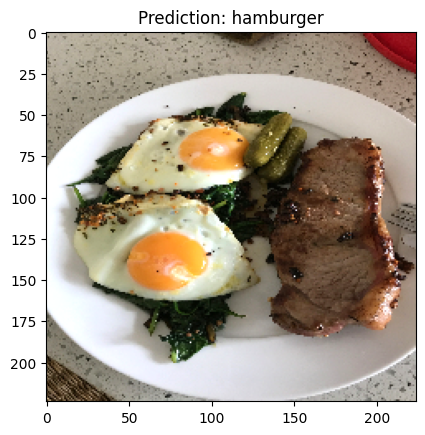

In [113]:
pred_and_plot(model=model_10,
              filename='03-steak.jpeg',
              class_name=class_names)

In [124]:
load_model_10 = tf.keras.models.load_model('./Models/CNN/model_10.h5')

In [126]:
load_model_10.evaluate(test_data)

79/79 [==============================] - 11s 136ms/step - loss: 1.7946 - accuracy: 0.3848


[1.7946330308914185, 0.384799987077713]

In [127]:
model_10.evaluate(test_data)

79/79 [==============================] - 11s 135ms/step - loss: 1.7946 - accuracy: 0.3848


[1.7946327924728394, 0.384799987077713]